In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Loading the Dataset.

In [2]:
df = pd.read_csv('HREmployeeAttrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### <u>`Problem Statement:`</u>

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### <u>`Attrition in HR:`</u>

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### <u>`Attrition affecting Companies:`</u>

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

##### <u>`Feature Columns:`</u>
 
- Age
- BusinessTravel  
- DailyRate        
- Department
- DistanceFromHome     
- Education            
- EducationField       
- EmployeeCount
- EmployeeNumber      
- EnvironmentSatisfaction  
- Gender                   
- HourlyRate          
- JobInvolvement
- JobLevel             
- JobRole               
- JobSatisfaction    
- MaritalStatus        
- MonthlyIncome
- MonthlyRate           
- NumCompaniesWorked
- Over18                
- OverTime              
- PercentSalaryHike      
- PerformanceRating       
- RelationshipSatisfaction  
- StandardHours           
- StockOptionLevel         
- TotalWorkingYears       
- TrainingTimesLastYear    
- WorkLifeBalance          
- YearsAtCompany           
- YearsInCurrentRole       
- YearsSinceLastPromotion
- YearsWithCurrManager     
 
######  <u>`Label:-`</u>
 
-   Attrition 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### <u>`Column data types:`</u>

- Feature columns:
    - Continuous
    - Categorical
- Target / label ('Attrition'):
    - Categorical

## `This is a Classification Problem since the Target variable / Label column ("Attrition") has Catergorical type of Data.`

#### Checking for null / values missing

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the dataset.

In [6]:
df.nunique() #Checking for unique elements in each of the columns

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
hrDF.loc[:, hrDF.nunique() == 1]

NameError: name 'hrDF' is not defined

There are 3 columns with only 1 type of values.

#### Getting the basic summary and statistical information of the data.

In [ ]:
hrDF.dtypes[hrDF.dtypes == 'int64'] #int64 type columns

In [ ]:
hrDF.dtypes[hrDF.dtypes != 'int64'] #object type columns

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- mean is greater than std, indicating a symmetric distribution.

- TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager have a big difference between 75% and max indicating the presence of outliers.

### Interpreting Relationship between Dependent and Independent Variables

#### Analyzing the Target Class

In [9]:
df['Attrition'].unique() 

array(['Yes', 'No'], dtype=object)

#### There are 2 unique catergorical values in the Label column / target variable.

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

`Class:`

- 'No' : Has 1233 values

- 'Yes' : Has 237 values



<AxesSubplot:xlabel='Attrition', ylabel='count'>

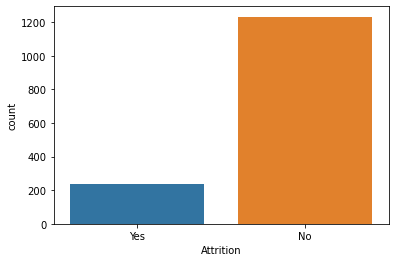

In [11]:
sns.countplot(df['Attrition'])

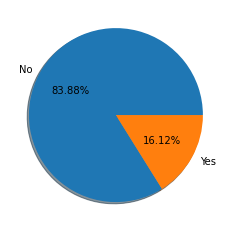

In [12]:
labels = 'No','Yes'
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

`Class:`

- 'No'   : Has 83.88% of total values

- 'Yes'  : Has 16.12% of total values




#### Classes are imbalanced.

#### Analyzing Feature column Catergorical Classes

In [13]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

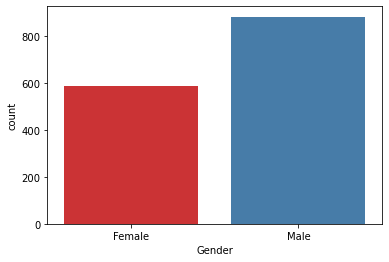

In [14]:
sns.countplot(df['Gender'], palette="Set1")

There are more Male employees than Female Employees.

In [15]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

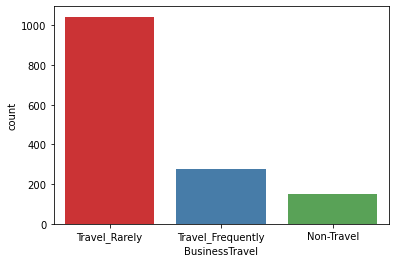

In [16]:
sns.countplot(df['BusinessTravel'], palette="Set1")

`Most employees Travel Rarely, Few Travel Frequently and vey less employees are Non-Travel.`

In [17]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

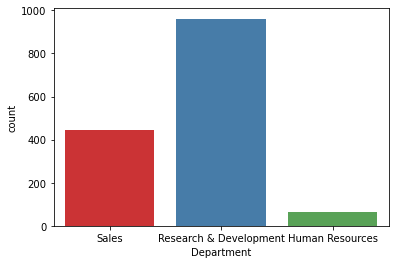

In [18]:
sns.countplot(df['Department'], palette="Set1")

`Most employees belong to Research and Development, followed by Sales and then Human Resources.`

In [19]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

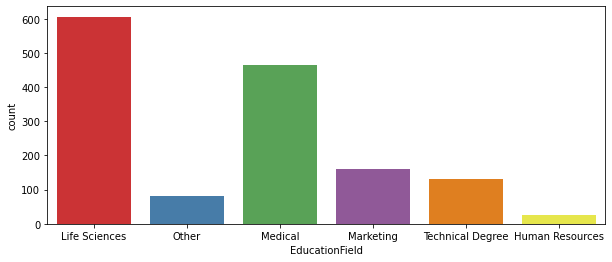

In [20]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(df['EducationField'], palette="Set1")

`Most number of employees have an Educational background in Life Sciences, Followed by Medical and then remaining fields.`

In [21]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='JobRole', ylabel='count'>

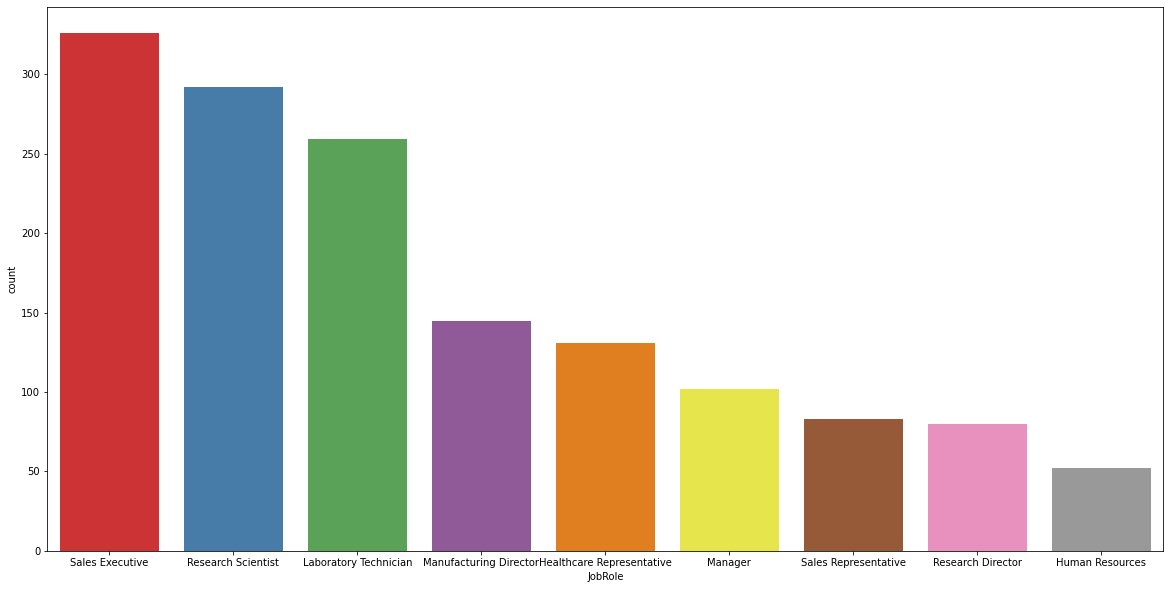

In [22]:
plt.figure(figsize=(20,10),facecolor='white')
sns.countplot(df['JobRole'], palette="Set1")

`Highest number of Employees are Sales Executives, followed by Research Scientist and Laboratory Technicians andd so on.`

In [23]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

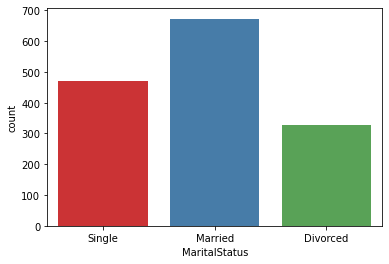

In [24]:
sns.countplot(df['MaritalStatus'], palette="Set1")

`Highest number of employees is Married, followed by Single and then by Divorced.`

In [25]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

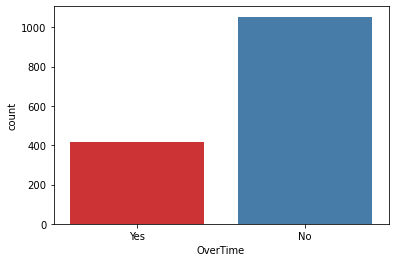

In [26]:
sns.countplot(df['OverTime'], palette="Set1")

` Most Employees don't do Overtime but few employees do overtime.`

### Interpreting Relationship between Dependent Variable and Independent Variables

##### 'Attrition' vs Continuous/Discrete Data Columns

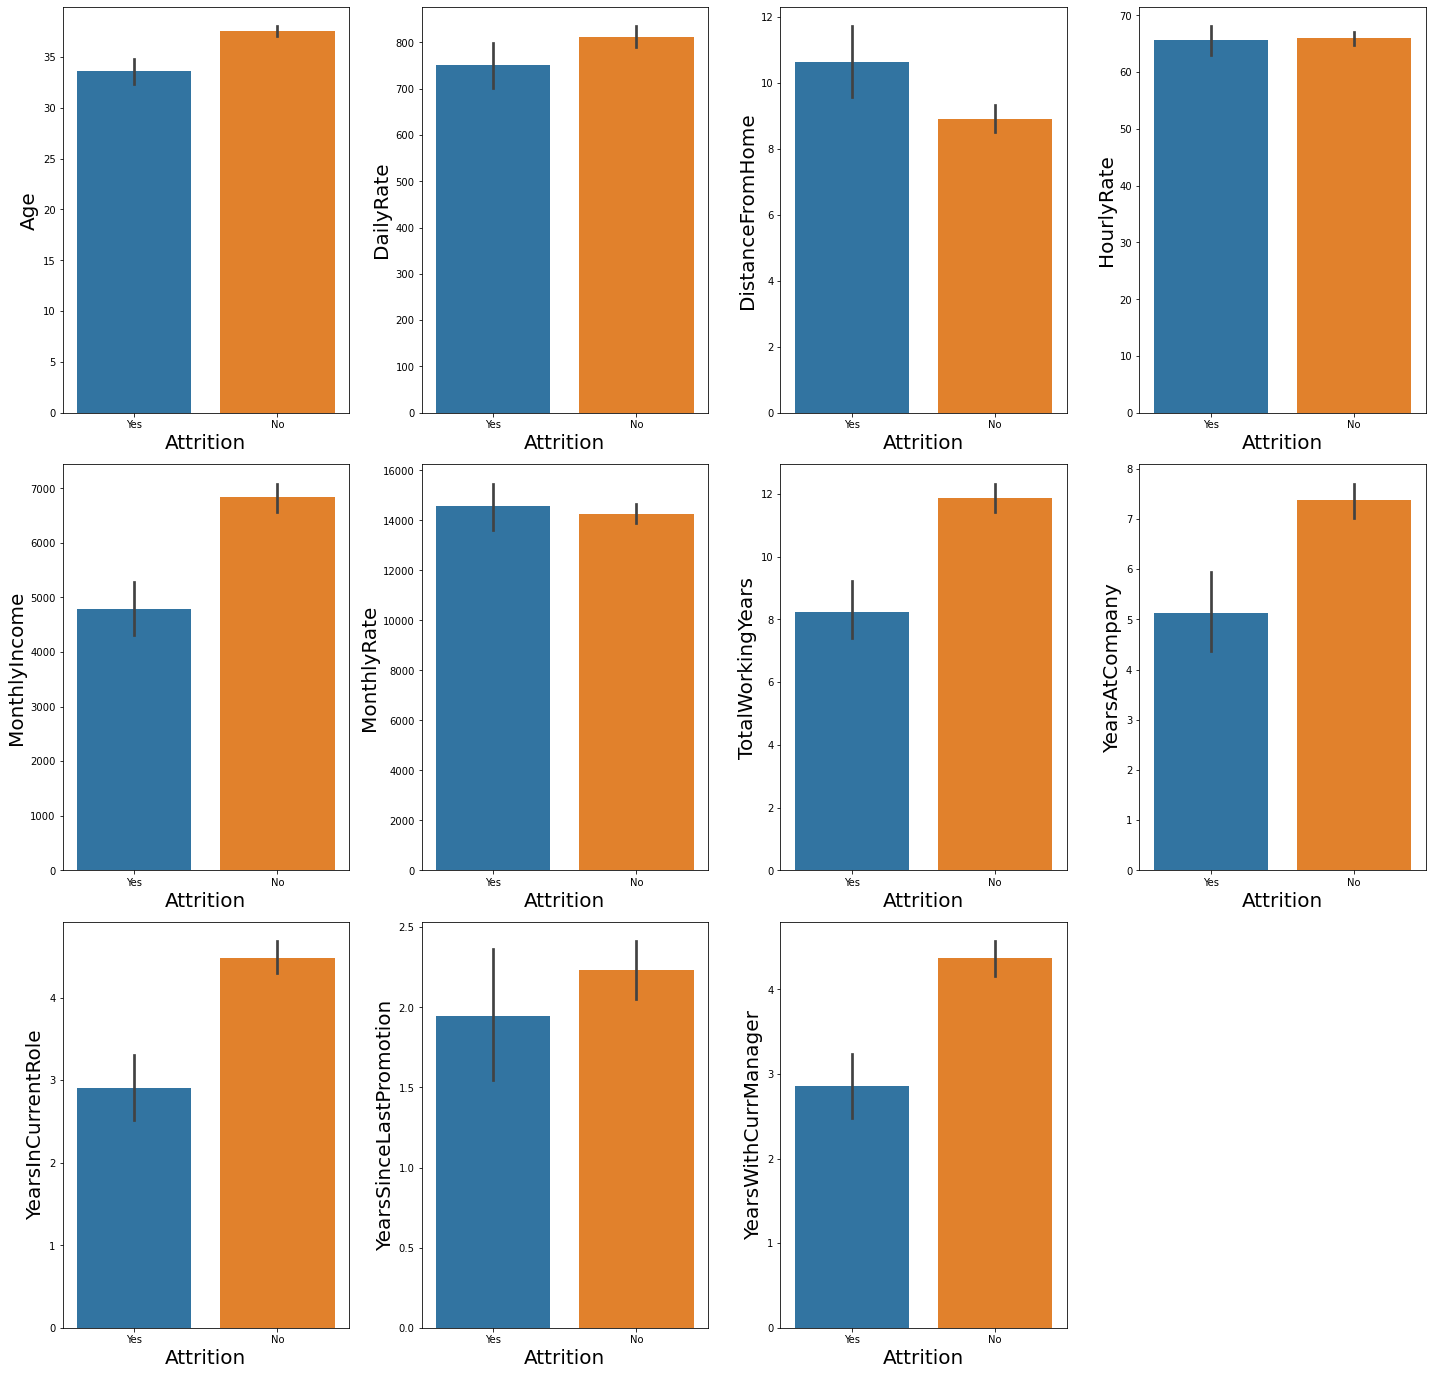

In [27]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
x = df['Attrition']
y = df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
for col in y:
    if plotnum<=15:
        plt.subplot(4,4,plotnum)
        sns.barplot(x,y[col])
        plt.xlabel('Attrition',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

<u>`Observations:`</u>

- Ages under 35 are contributing the most to Attrition
- High number of people who are 35 and above have been retained.

- In terms of DailyRate, there isn't much of a difference in number between those who left and those who didnt, however attrition is higher amongst those with lower DailyRate

- Distance from home greater than 10 is a deciding factor for Attrition

- HourlyRate doesn't seem to contribute to Attrition.

- Employees whose MonthlyIncome is below 5000 are contributing to Attrition

- MonthlyRate doesn't have much effect on Attrition

- Employees having Total working years under 9 are mostly contributing to Attrition

- Employees having worked 6 years at the company or less have more impact on Attrition.

- Employees having gone upto 2 years since last promotion have higher Attrition.

- Employees having worked under current manager for 3 years and less have high Attrition.

##### 'Attrition' vs Categorical Data Columns

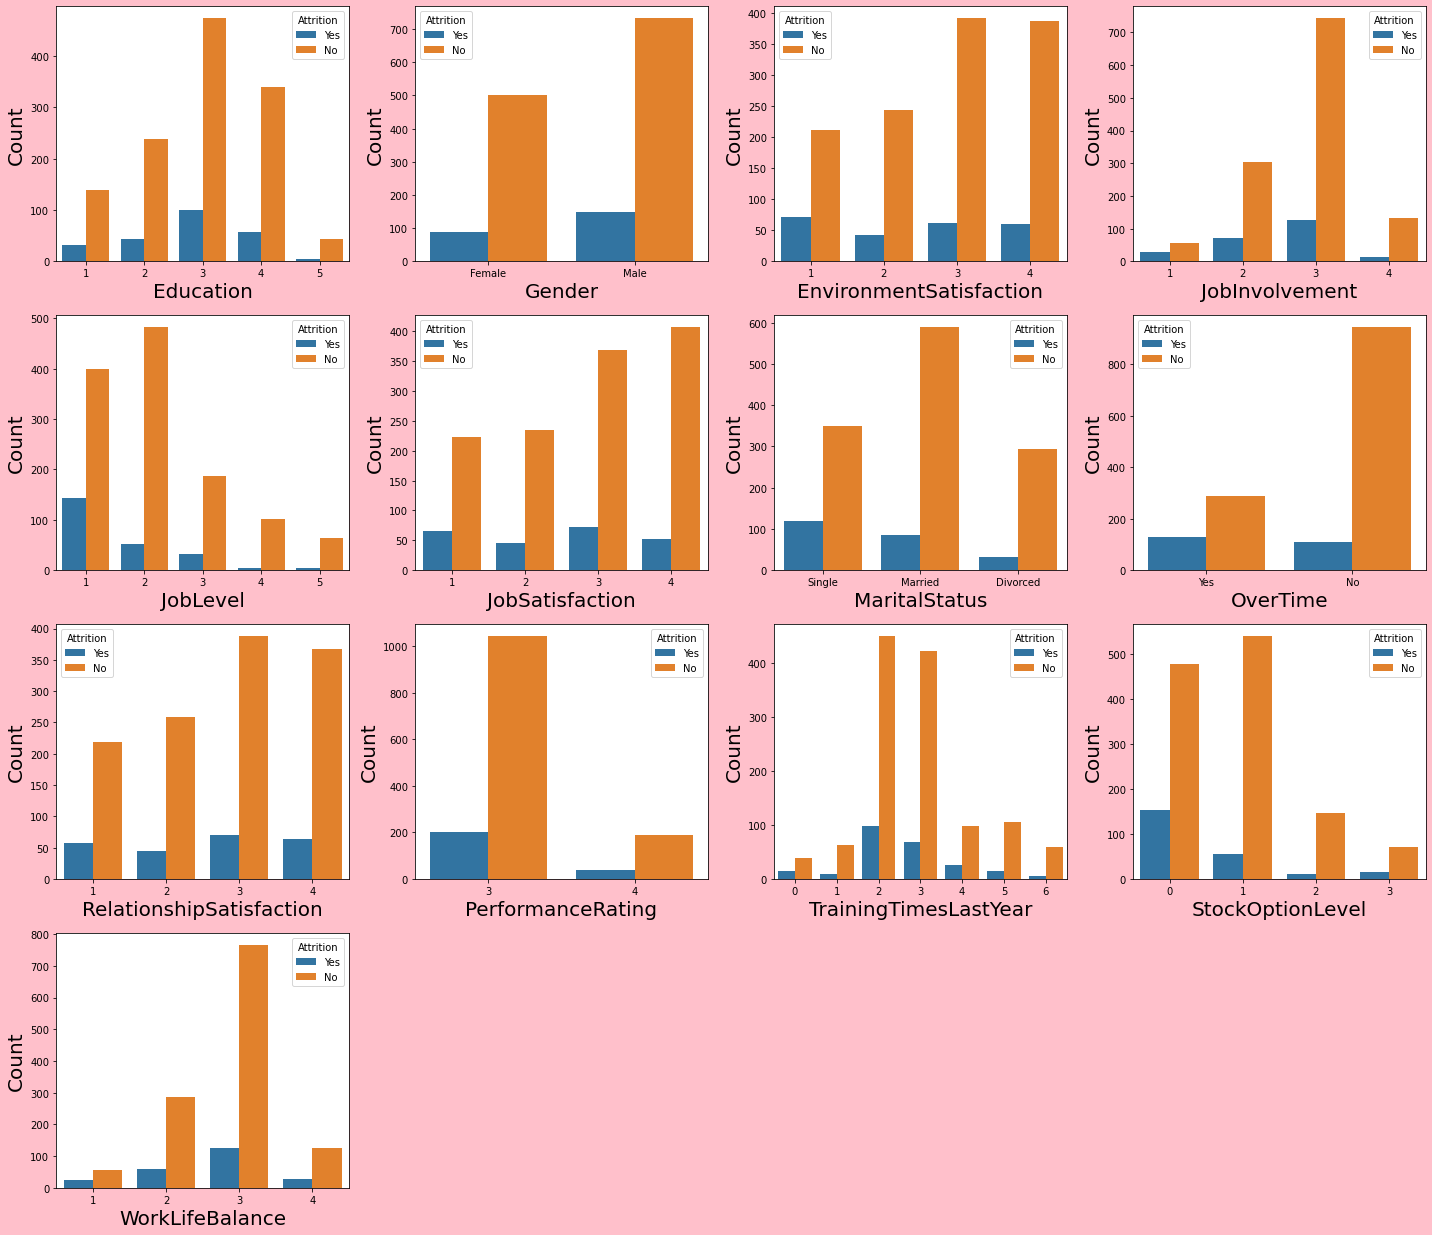

In [28]:
plt.figure(figsize=(20,21),facecolor='pink')
plotnum=1
x = df[['Education','Gender','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','PerformanceRating','TrainingTimesLastYear','StockOptionLevel','WorkLifeBalance']]
y = df['Attrition']
for col in x:
    if plotnum<=23:
        plt.subplot(5,4,plotnum)
        sns.countplot(x[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

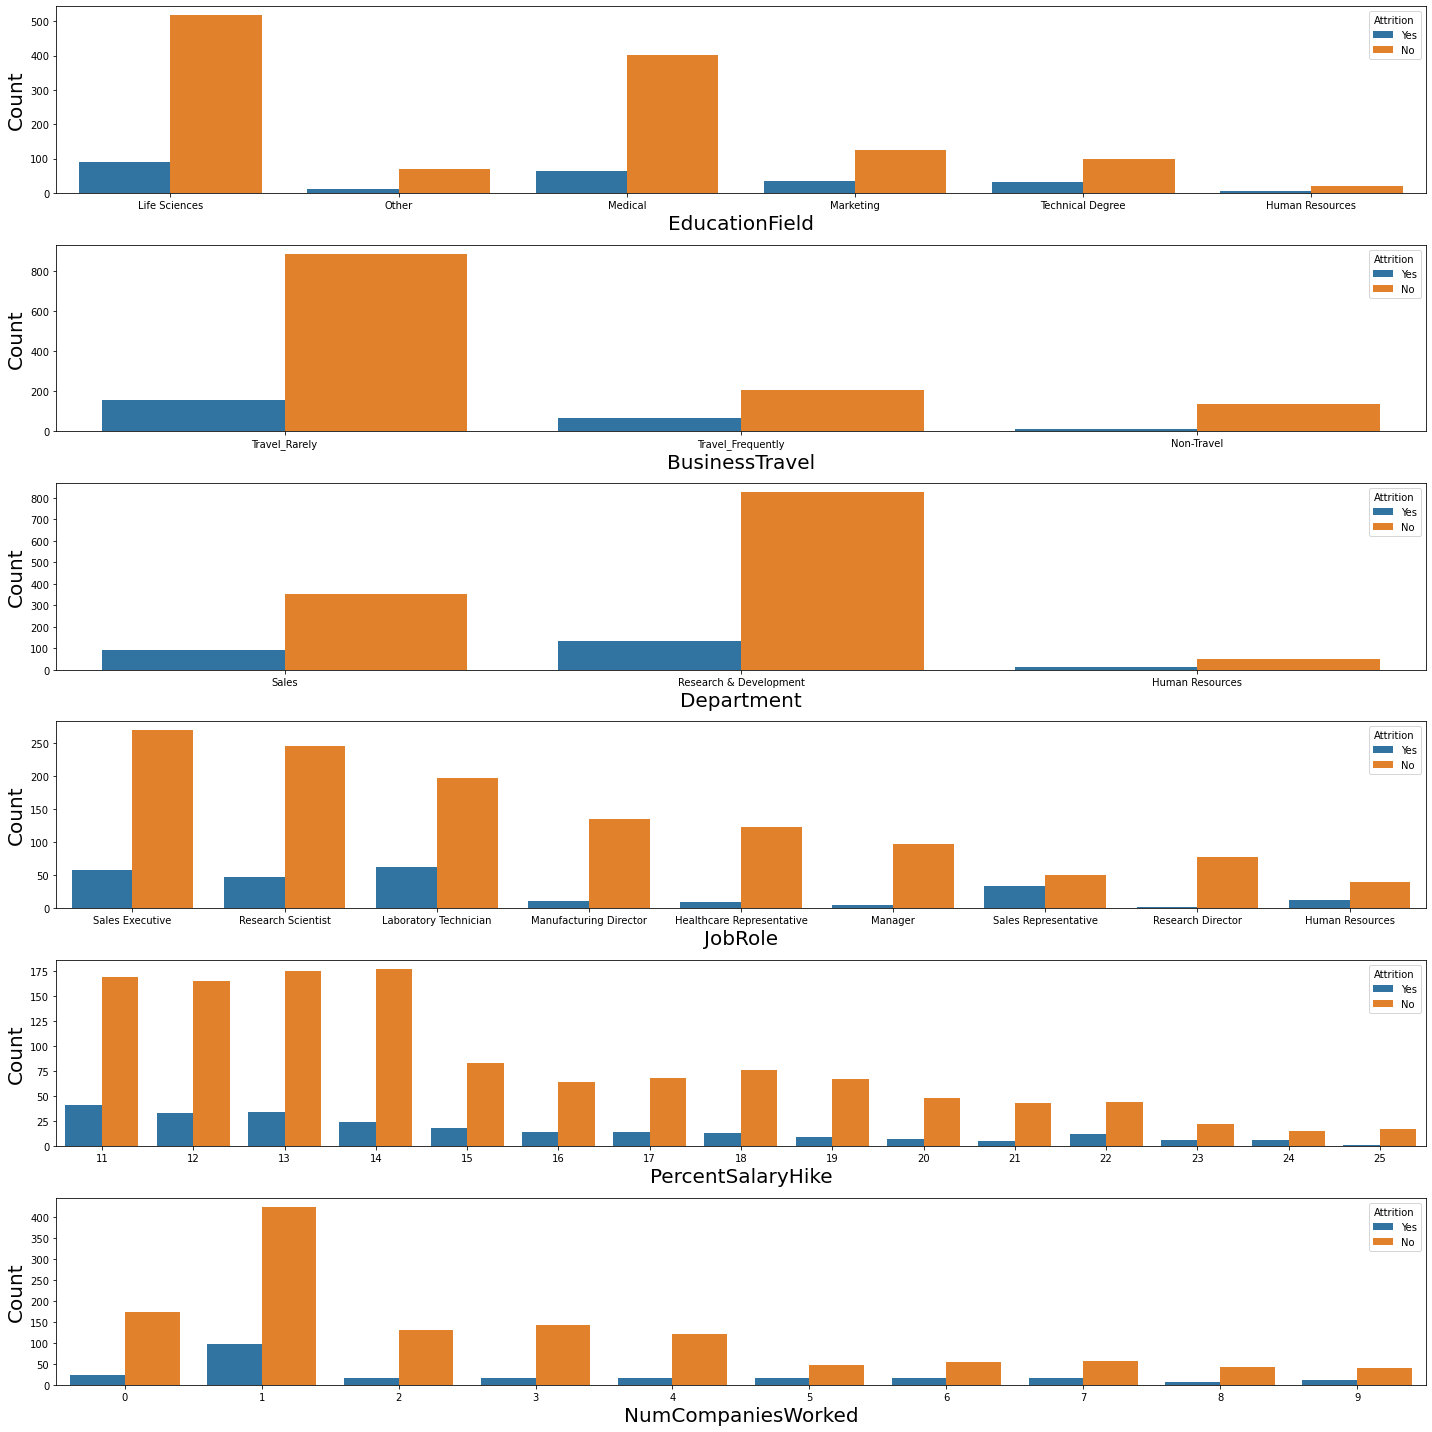

In [29]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
x = df[['EducationField','BusinessTravel','Department','JobRole','PercentSalaryHike','NumCompaniesWorked']]
y = df['Attrition']
for col in x:
    if plotnum<=23:
        plt.subplot(6,1,plotnum)
        sns.countplot(x[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

### <u>`Observations:`</u>

- Employees with Education '3' and '4' are retained the most. Employees with  Education '3' are also the most to leave.  
    
- Employees with EducationFields Life Sciences and Medical are retained the most. 
- Employees with EducationFields Life Sciences are also the most to leave.    
    
- Employees who Travel rarely are retained the most.    
    
- Employees belonging to Reseach and Development  are retained the most followed by Sales.  While Employees belonging to Reseach and Development also contribute the most to Attrition.
    
- The number of male employees retained is a bit greater than the number of female employees retained. Male employees also contribute the most to Attrition.

- Employees with greater Environment Satisfaction are retained. While Employees with lowest Environment Satisfaction contribute the most to Attrition.

- Employees with Job Involvement of 3 are retained the most.

- Employees with Job level 3 and 2 are retained the most. While employees with job Level 1 contribute the most to Attrition.

- Sales Executives,Research Scientists, Laboratory Technicians are amongst the most retained employees. Sales Executives and Laboratory Technicians also contribute more to attrition than Research Scientists.

- Employees with Highest Job Satisfaction of 4 and 3  are amongst the most retained employees.   
    
- More Married Employees are retained than single and divorced.

- Employees who don't do overtime are retained the most.

- Employees who have worked in 1 and 0 companies before are retained more than those with work history in multiple companies.
- Employees who have worked in 1 company before are the most to leave.

- Employees with lowest Salary percentage hike contribute most to Attrition.

- Employees with Highest Relationship Satisfaction of 3 and 4 are those who are retained the most.

- Employees with Performance Rating 3 are retained a lot more than those with Performance Rating 4 

- Employees with Training Times of 2 and 3 Last Year are retained the most.

- Employees with StockOption level 1 are retained the most. While Employees with stock optoion level 0 contribute most to Attrition.

- Employees with worklife balance of 3 are retained the most.


#### Dropping columns 'EmployeeCount','Over18','StandardHours' and 'EmployeeNumber' as they are not required for predicting values of target column

In [30]:
df.drop(columns = ['EmployeeCount','Over18','StandardHours','EmployeeNumber'],inplace=True)

In [31]:
df.shape

(1470, 31)

### Checking for Outliers

In [32]:
x = df.drop(columns = ['Attrition'])
y = df['Attrition']

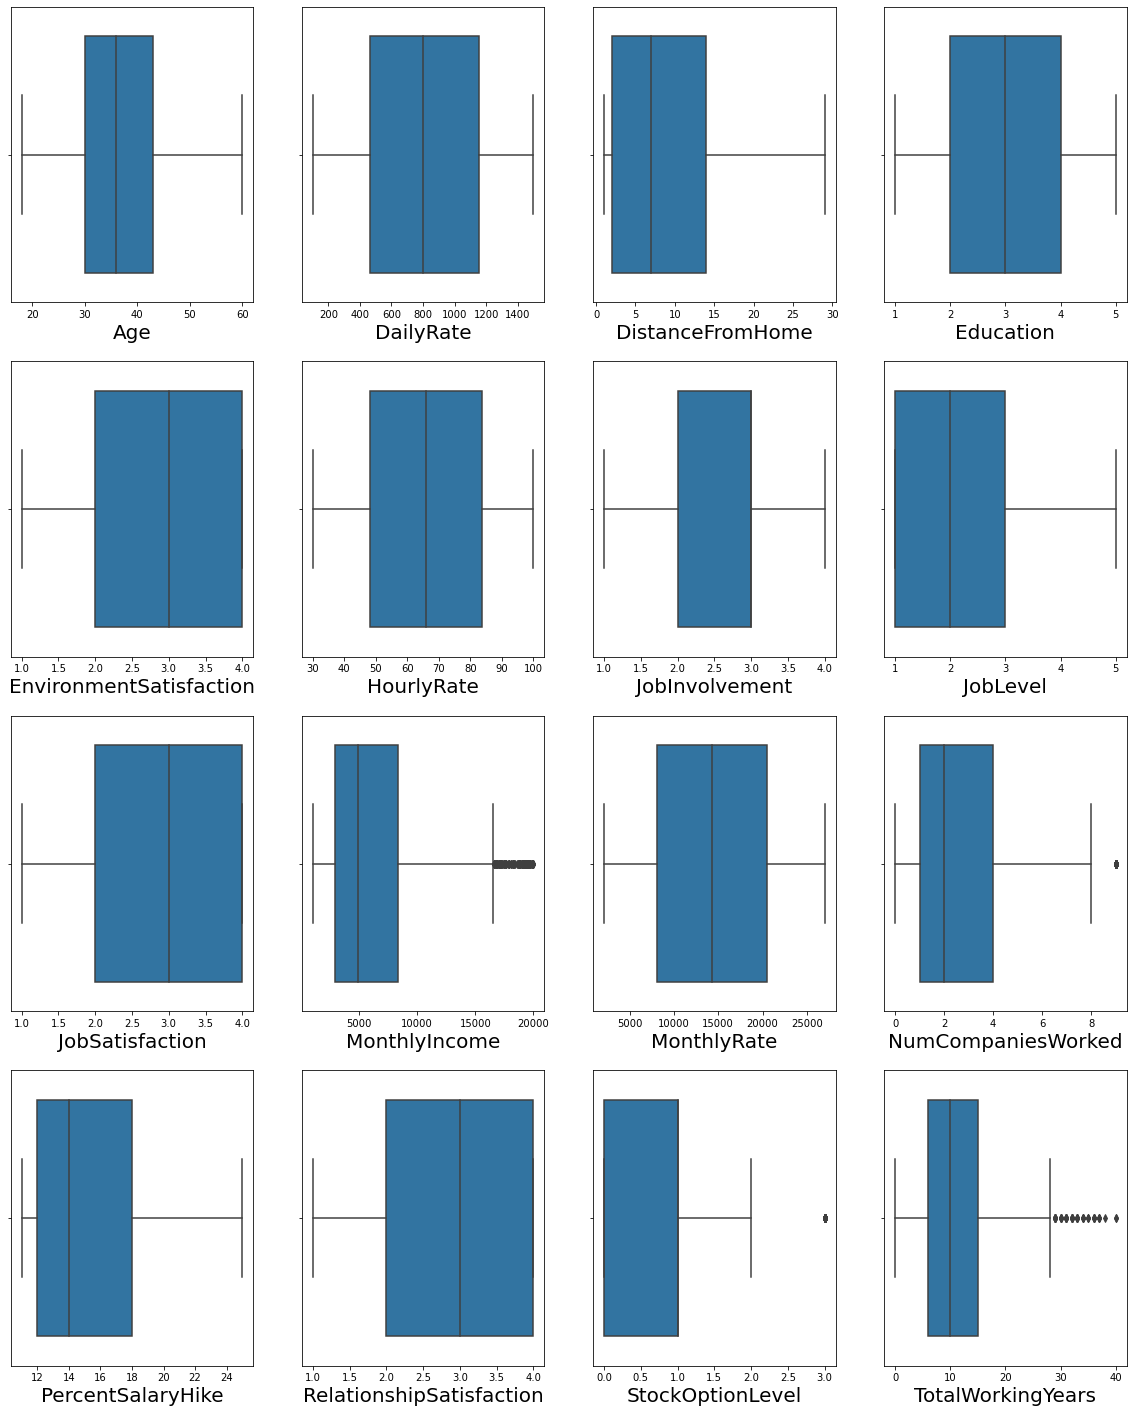

In [33]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in x.drop(columns = ['BusinessTravel','Department','PerformanceRating','EducationField','Gender','JobRole','MaritalStatus','OverTime']):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

`'MonthlyIncome' and 'TotalWorkingYears' have outliers.`

#### Removing Outliers using Z score Method

In [34]:
df2 = x.drop(columns = ['BusinessTravel','Department','PerformanceRating','EducationField','Gender','JobRole','MaritalStatus','OverTime']).copy()

In [35]:
df2

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,11,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,23,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,15,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,11,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,17,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,15,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,20,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,14,4,0,17,3,2,9,6,0,8


In [36]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [37]:
df3.shape

(1387, 22)

In [38]:
df2.shape

(1470, 22)

##### Data loss %:

In [39]:
loss=(1470-1387)/1470 * 100
loss

5.646258503401361

`5.646% data loss is within acceptable range.`

#### Using IQR Method

In [40]:
df4 =x.drop(columns = ['BusinessTravel','Department','PerformanceRating','EducationField','Gender','JobRole','MaritalStatus','OverTime']).copy()

In [41]:
# finding all the indices of outliers in the columns using IQR and append them to indxdrop array:

indxdrop = np.array([])
for colm in df4:
    q1 = df4[colm].quantile(0.25)
    q3 = df4[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df4[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)


In [42]:
indxdrop

array([  25.,   29.,   45.,   62.,  105.,  106.,  112.,  119.,  123.,
        147.,  165.,  186.,  187.,  190.,  194.,  231.,  233.,  237.,
        244.,  257.,  263.,  270.,  279.,  280.,  290.,  314.,  326.,
        329.,  379.,  392.,  400.,  411.,  417.,  425.,  429.,  445.,
        466.,  473.,  477.,  489.,  497.,  535.,  538.,  561.,  568.,
        584.,  588.,  592.,  595.,  609.,  653.,  699.,  710.,  714.,
        716.,  741.,  746.,  749.,  755.,  766.,  770.,  774.,  799.,
        804.,  810.,  814.,  851.,  858.,  861.,  867.,  869.,  894.,
        898.,  899.,  904.,  907.,  913.,  916.,  918.,  922.,  936.,
        937.,  945.,  954.,  955.,  956.,  999., 1008., 1009., 1024.,
       1043., 1055., 1080., 1116., 1126., 1129., 1135., 1140., 1154.,
       1184., 1185., 1225., 1242., 1264., 1277., 1330., 1331., 1348.,
       1351., 1374., 1377., 1401., 1437., 1443.,    4.,   38.,   50.,
         95.,  105.,  122.,  194.,  198.,  208.,  245.,  287.,  290.,
        334.,  371.,

In [43]:
df4 = df4.drop(indxdrop)

In [44]:
df4.shape

(925, 22)

In [45]:
df2.shape

(1470, 22)

##### Data loss %:

In [46]:
loss=(1470-925)/1470 * 100
loss

37.07482993197279

`37.07% data loss is not within acceptable range.`

#### Using Z score method to reduce outliers

In [47]:
dropindx = x.index.difference(df3.index)

In [48]:
dropindx

Int64Index([  28,   45,   62,   63,   64,   85,   98,  110,  123,  126,  153,
             178,  187,  190,  218,  231,  237,  270,  281,  326,  386,  401,
             411,  425,  427,  445,  466,  473,  477,  535,  561,  584,  592,
             595,  616,  624,  635,  653,  677,  686,  701,  716,  746,  749,
             752,  799,  838,  861,  875,  894,  914,  918,  922,  926,  937,
             956,  962,  976, 1008, 1024, 1043, 1078, 1086, 1093, 1111, 1116,
            1135, 1138, 1156, 1184, 1221, 1223, 1242, 1295, 1301, 1303, 1327,
            1331, 1348, 1351, 1401, 1414, 1430],
           dtype='int64')

In [ ]:
#dropping the outliers from original features Dataframe:

df.drop(dropindx,inplace = True)

In [49]:
df.reset_index(drop=True,inplace = True)

In [50]:
df.shape

(1470, 31)

In [51]:
x = df.drop(columns = ['Attrition'])
y = df['Attrition']

#### Checking for Skewness in Data

In [52]:
x.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

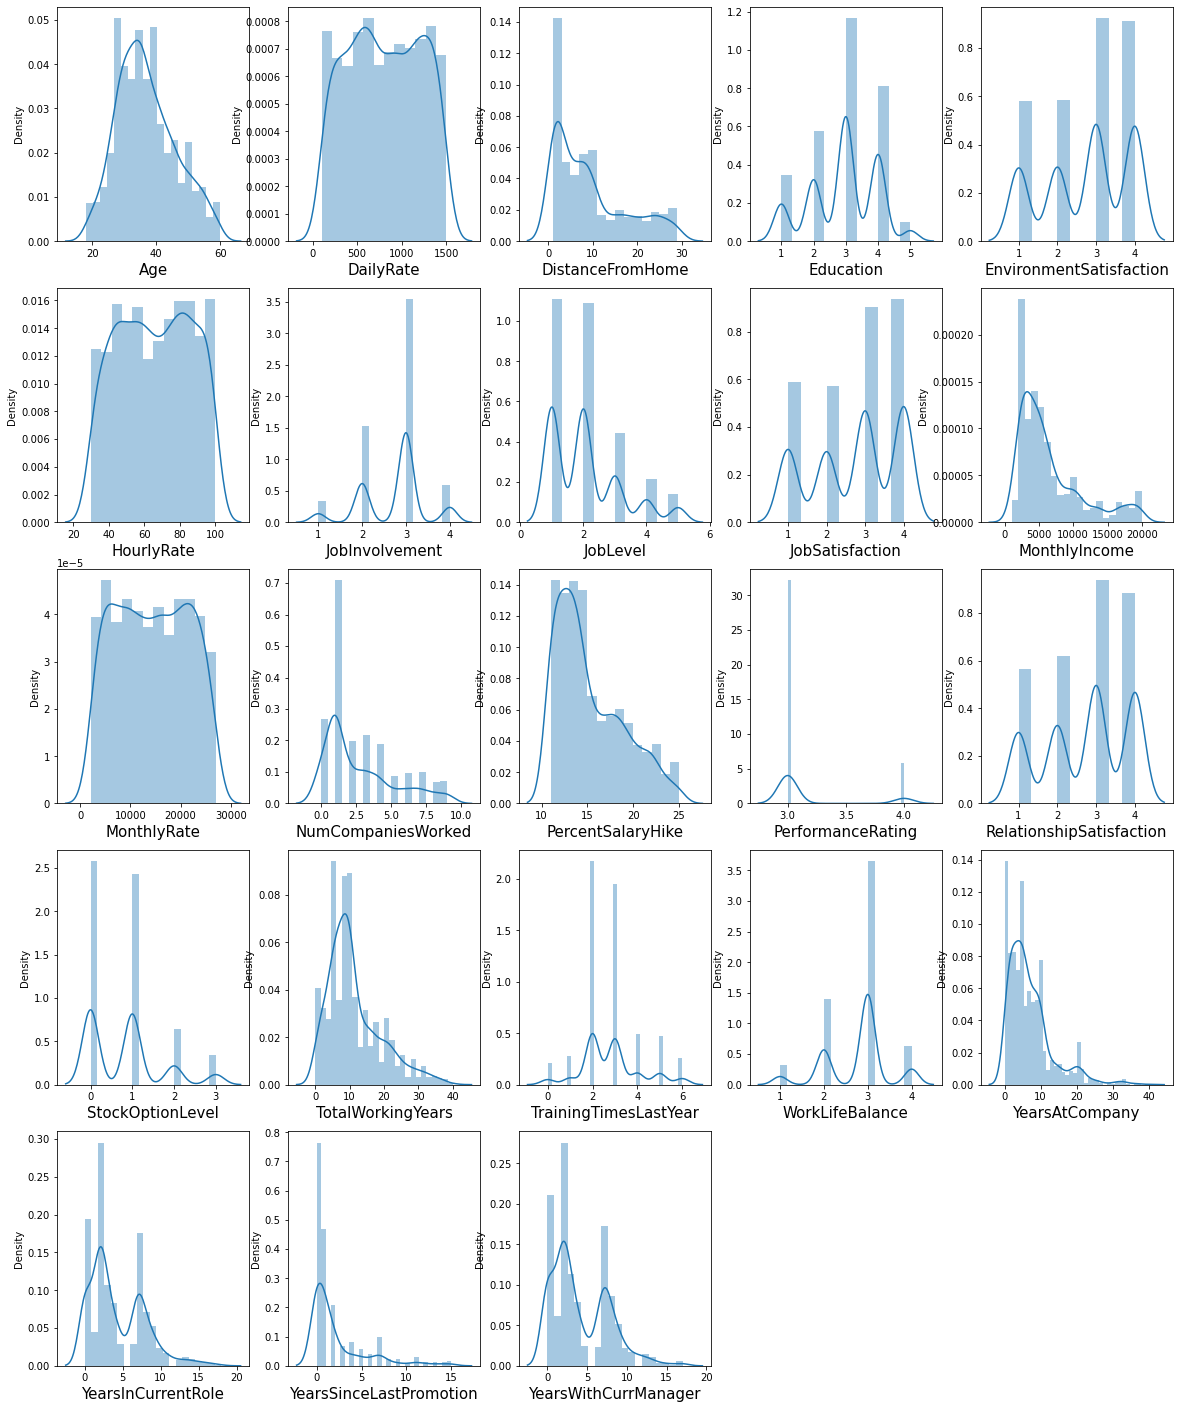

In [53]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in x.drop(columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']):
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

Skewness is present in DistanceFromHome,  MonthlyIncome,  TotalWorkingYears,  YearsatCompany,  PercentSalaryHike, YearsWithCurrManager, YearsInCurrentRole.

#### Reducing more skewness using PowerTransformer:

In [54]:
from sklearn.preprocessing import PowerTransformer

In [55]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [56]:
df5 = x[['DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany','PercentSalaryHike','YearsWithCurrManager','YearsInCurrentRole']]

In [57]:
transformed= powtrans.fit_transform(df5)

In [58]:
transformed = pd.DataFrame(transformed, columns=df5.columns) #to convert numpy array back into dataframe


In [59]:
transformed.skew()

DistanceFromHome       -0.007468
MonthlyIncome           0.000000
TotalWorkingYears      -0.010653
YearsAtCompany         -0.008683
PercentSalaryHike       0.116250
YearsWithCurrManager   -0.067565
YearsInCurrentRole     -0.060849
dtype: float64

In [60]:
transformed.index = x.index

In [61]:
x[['DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany','PercentSalaryHike','YearsWithCurrManager','YearsInCurrentRole']] = transformed[['DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany','PercentSalaryHike','YearsWithCurrManager','YearsInCurrentRole']]

In [62]:
x.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.007468
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               0.000000
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.008683
YearsInCurrentRole         -0.060849
YearsSinceLastPromotion     1.984290
YearsWithCurrManager       -0.067565
dtype: float64

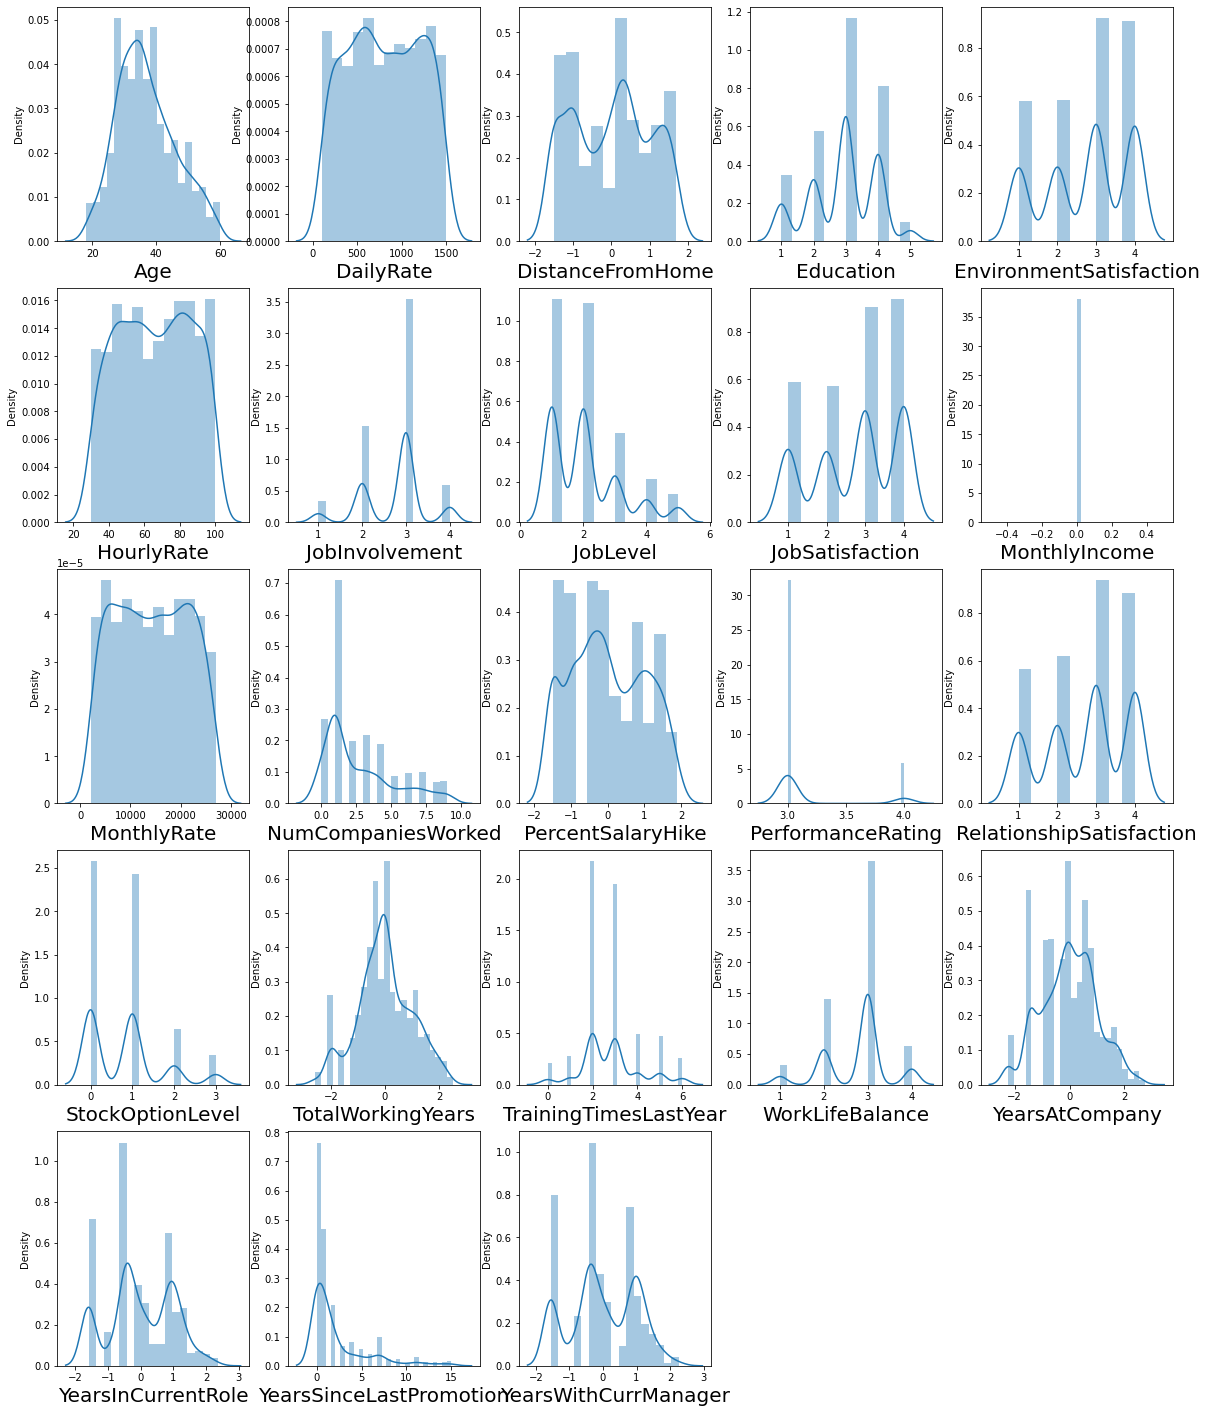

In [68]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in x.drop(columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']):
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### Distributions look much more Normalised now

### Encoding the  categorical Feature Columns.

In [69]:
x[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

#### Encoding using get_dummies()

In [70]:
dumm = pd.get_dummies(x[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']],drop_first = False)

In [71]:
dumm

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1466,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1467,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
1468,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [72]:
df = df.join(dumm)

In [73]:
df.drop(columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'],axis = 1, inplace = True)

### Encoding the Label Column.

In [74]:
df['Attrition'] = df.Attrition.map({'No':0,'Yes':1}) #'No' = 1 and 'Yes' = 0

### Finding Correlation 

In [75]:
h_corr = df.corr()
h_corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185,-0.028062,0.028062
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419,-0.246118,0.246118
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835,-0.009135,0.009135
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445,-0.025514,0.025514
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168,0.020322,-0.020322
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035,-0.070132,0.070132
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436,0.007782,-0.007782
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.016815,0.028324,-0.045253,0.003507,-0.003507
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,0.114896,0.414319,-0.387788,0.127490,-0.216559,0.037087,0.050547,-0.087072,-0.000544,0.000544
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,-0.013747,-0.006217,0.020503,0.012604,0.001413,-0.015197,-0.010315,0.024571,-0.024539,0.024539


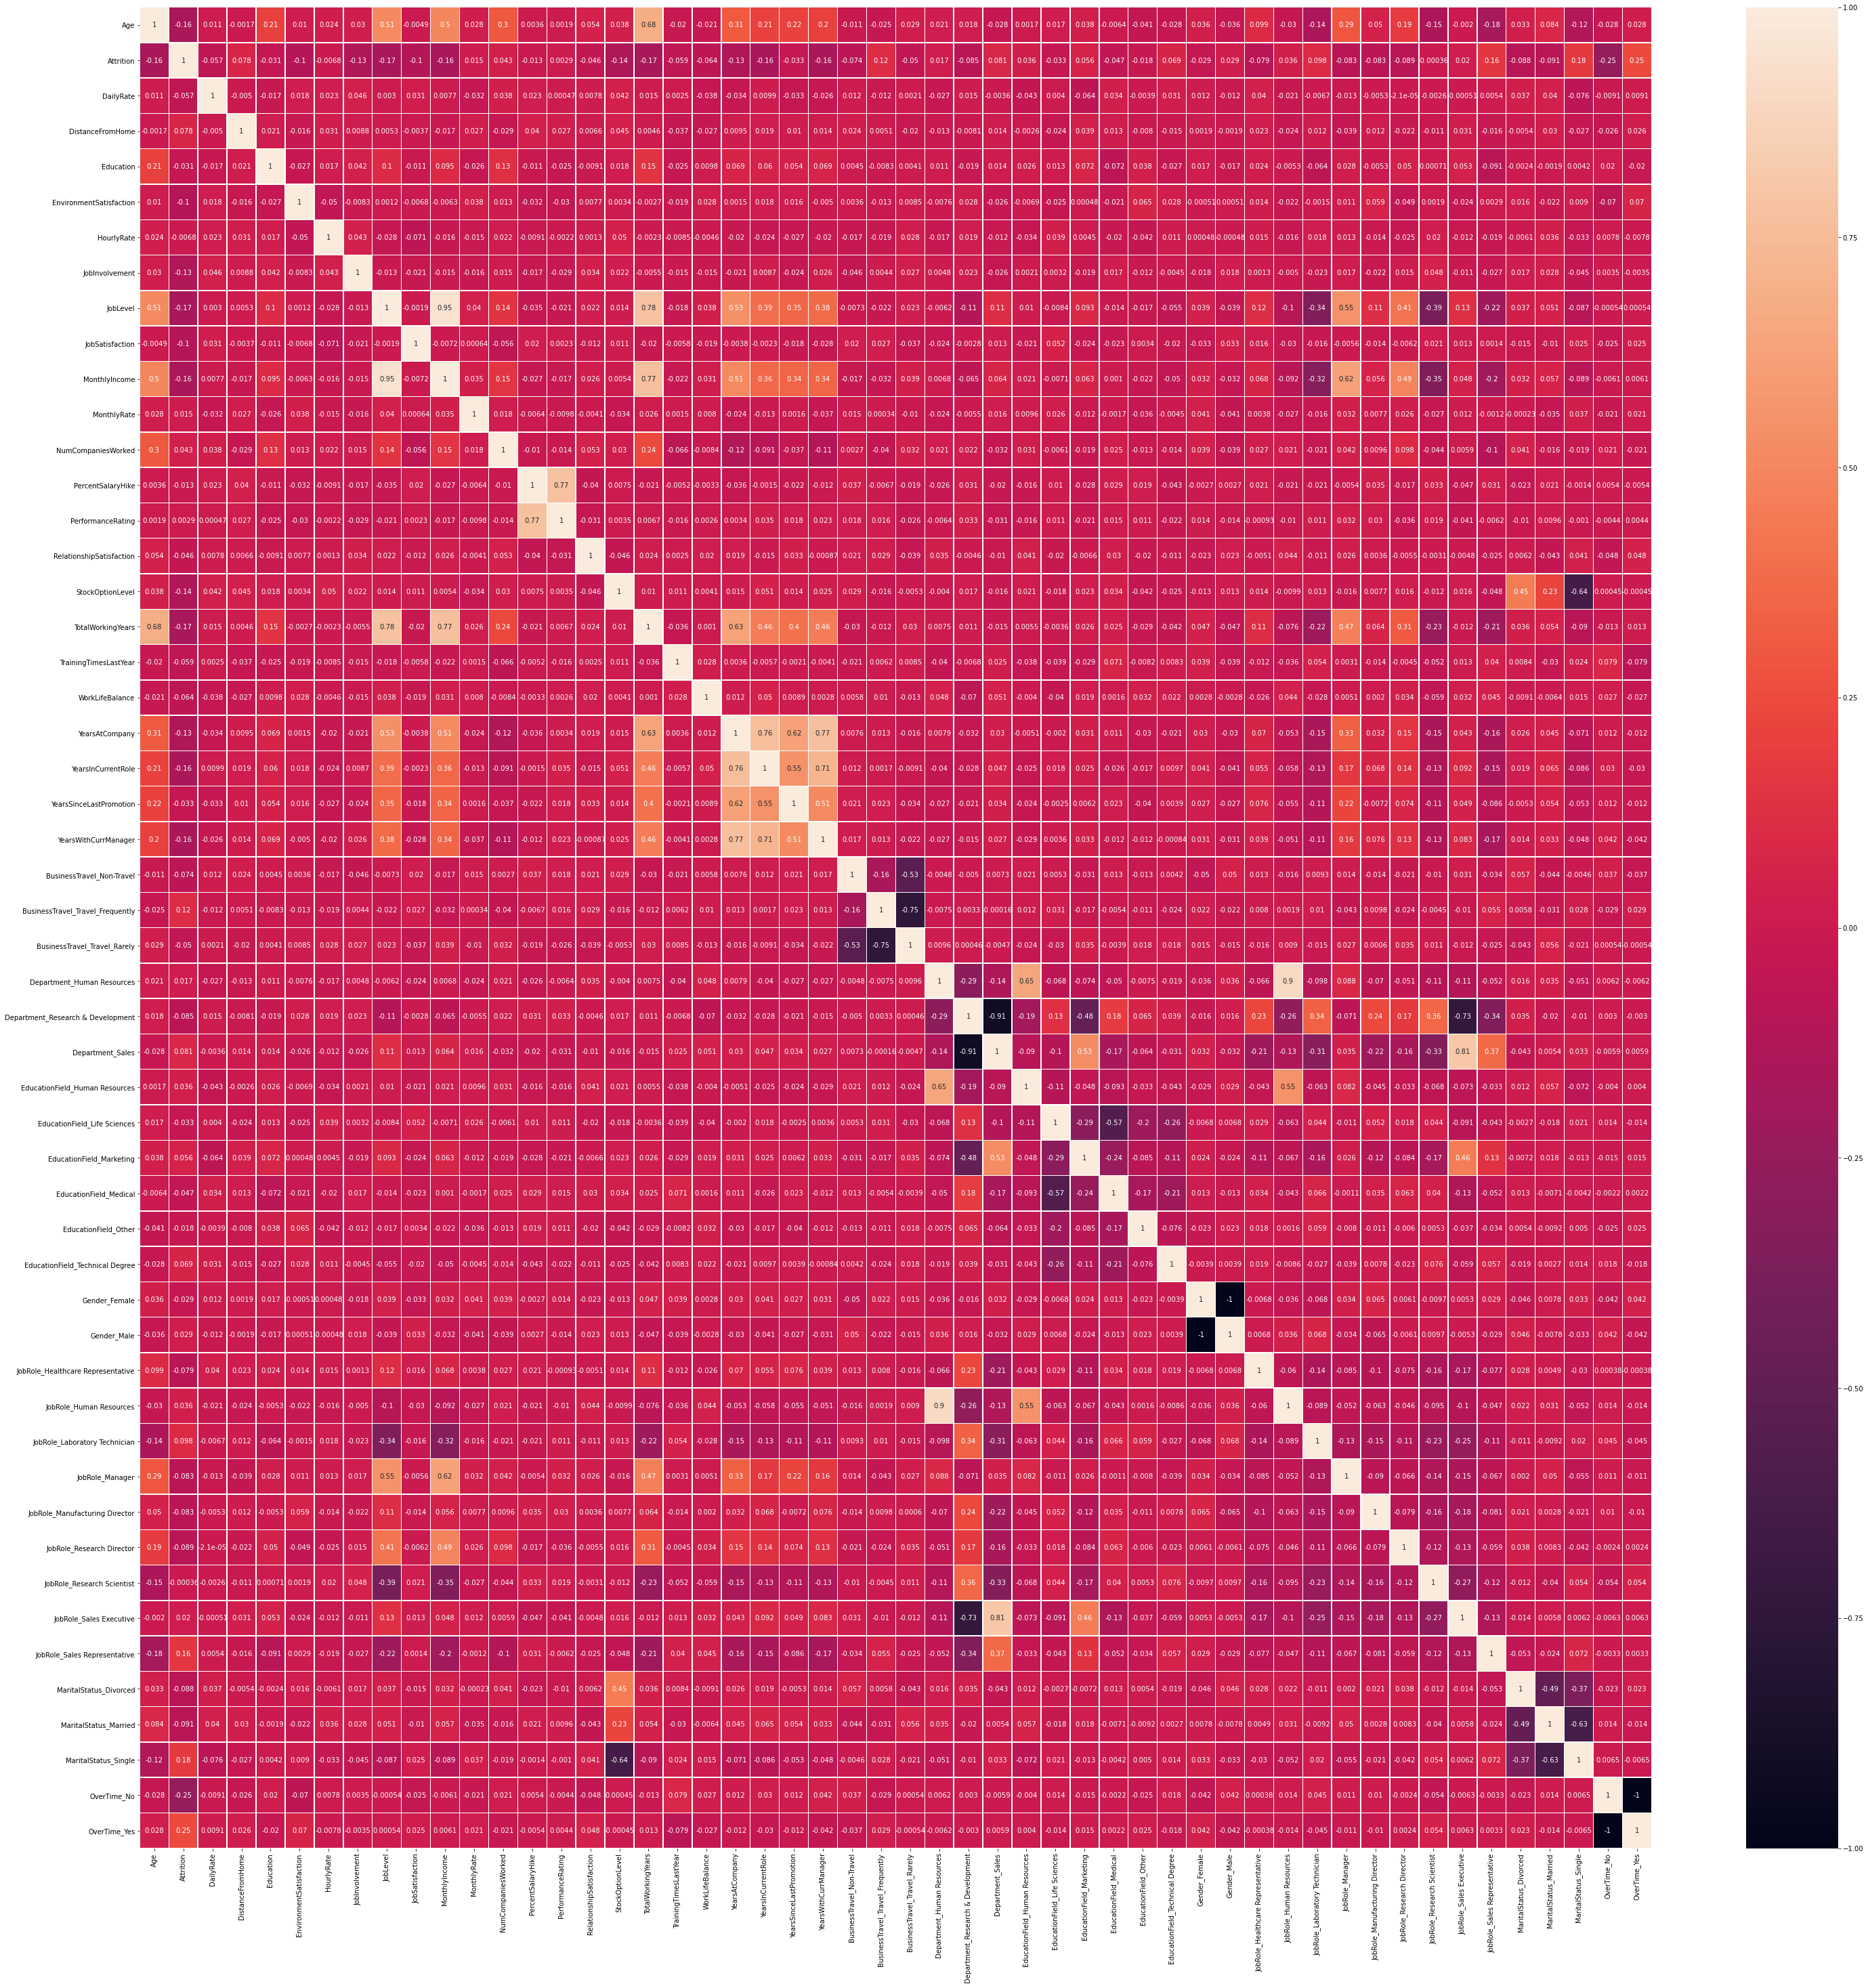

In [80]:
plt.figure(figsize=(50,50))
sns.heatmap(h_corr,annot=True,linewidth=0.5)
plt.show()

### Visualizing correlation of feature columns with label column.

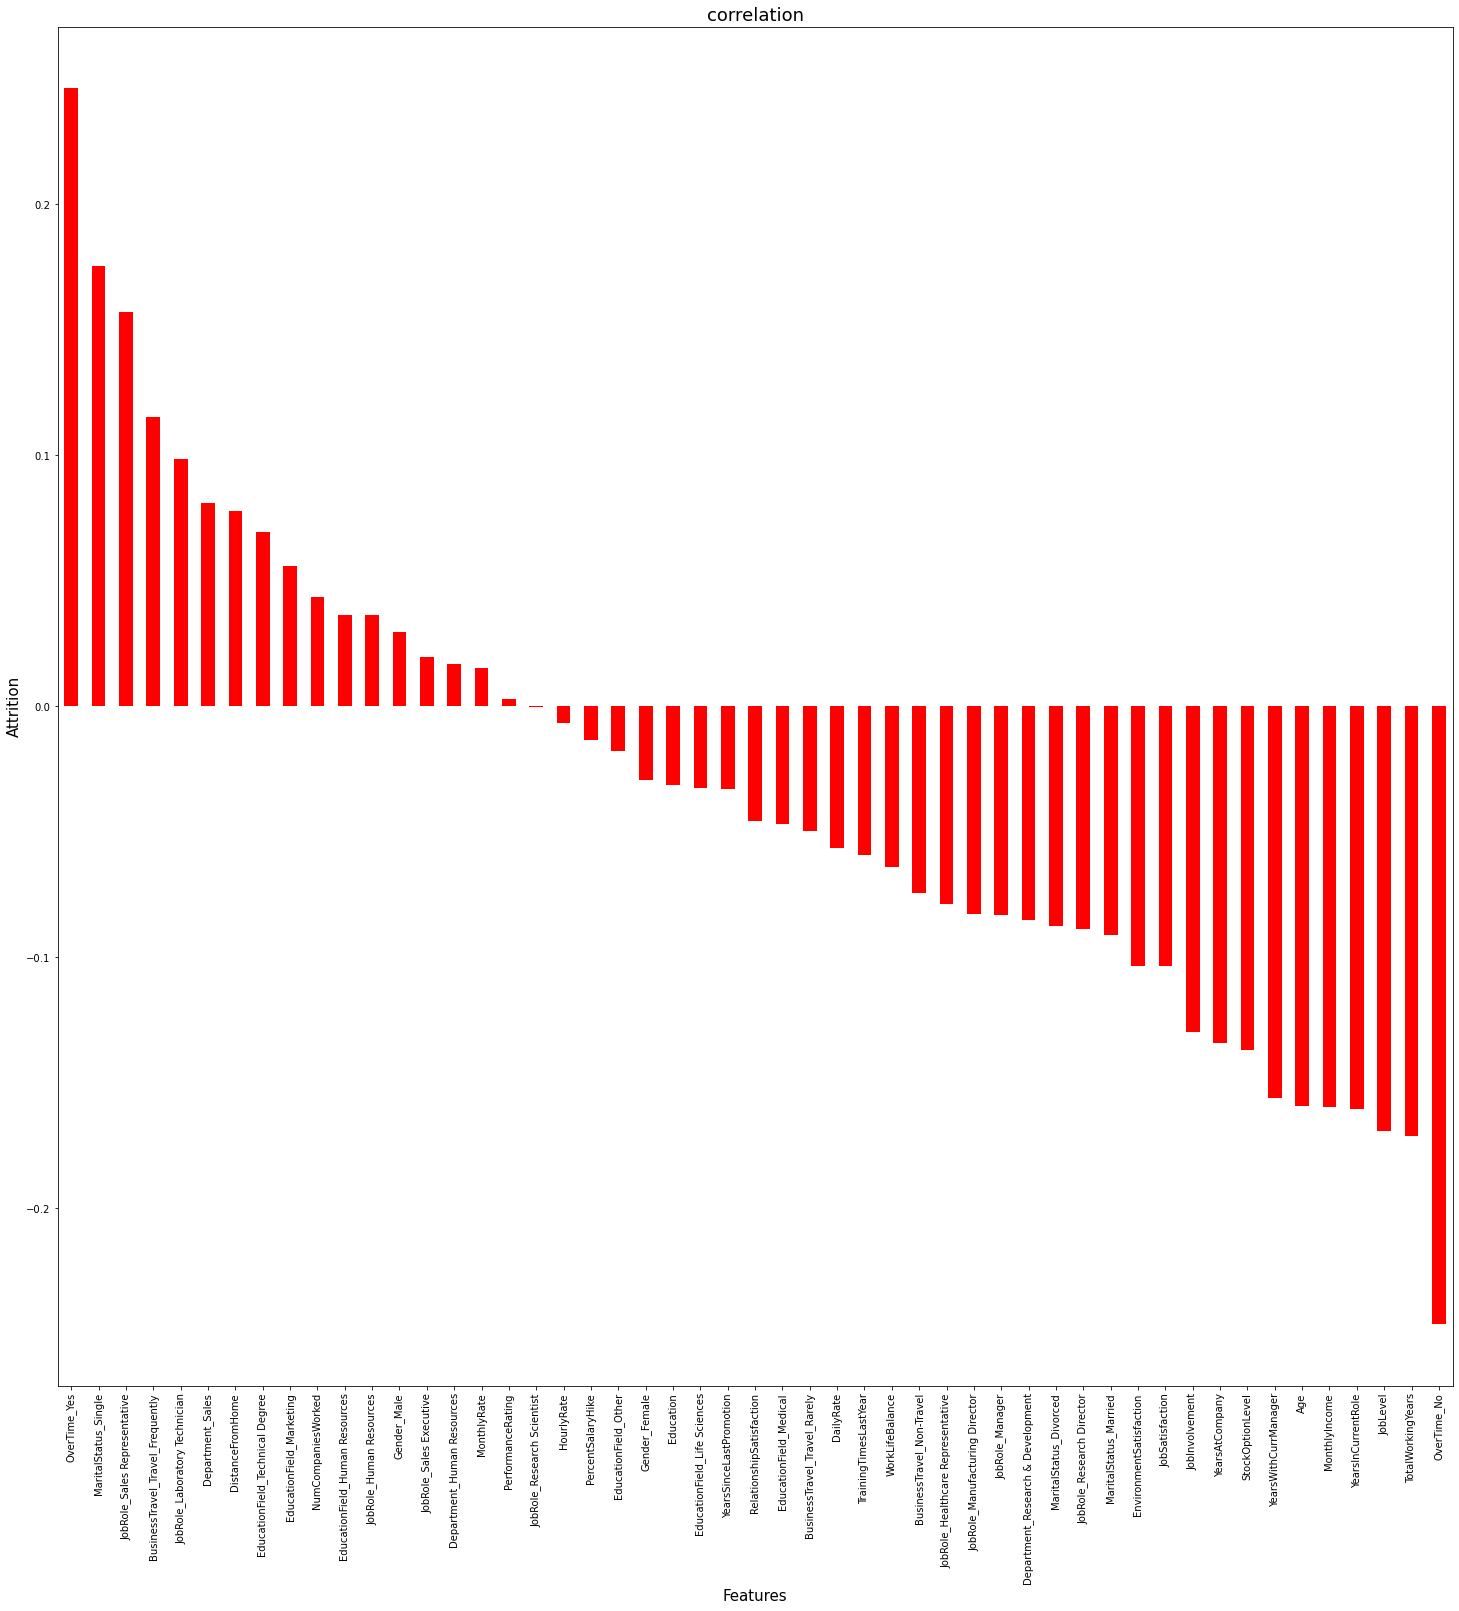

In [83]:
plt.figure(figsize = (25,25))
df.corr()['Attrition'].sort_values(ascending = False).drop(['Attrition']).plot(kind='bar',color = 'red')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

OverTime_Yes,Marital_status_Single,JobRole_Laboratory_Technician,BusinessTravel_Travel_Frequently,Department_Sales,DistanceFromHome,EducationField have the highest postive correlation with Attrition.

OverTime_No,TotalWorkingYears,JobLevel,YearsAtCompany,YearWithCurrManager,Age,StockOptionLevel,JobInvolvement,JobSatisfaction have the highest negative correlation with Attrition.

In [84]:
x = df.drop(columns = ['Attrition'])
y = df['Attrition']

### Feature Selection

In [85]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler= StandardScaler()
scaled_x = scaler.fit_transform(x)

In [88]:
scaled_x

array([[ 0.4463504 ,  0.74252653, -1.01090934, ...,  1.45864991,
        -1.59174553,  1.59174553],
       [ 1.32236521, -1.2977746 , -0.14714972, ..., -0.68556546,
         0.62824112, -0.62824112],
       [ 0.008343  ,  1.41436324, -0.88751511, ...,  1.45864991,
        -1.59174553,  1.59174553],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.68556546,
        -1.59174553,  1.59174553],
       [ 1.32236521,  0.54667746, -0.88751511, ..., -0.68556546,
         0.62824112, -0.62824112],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.68556546,
         0.62824112, -0.62824112]])

### Checking for Multicollinearity using Variance Inflation Factor

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
vif = pd.DataFrame()

In [91]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [92]:
vif

,Features,vif
0,Age,2.083223
1,DailyRate,1.034936
2,DistanceFromHome,1.022804
3,Education,1.083566
4,EnvironmentSatisfaction,1.030079
5,HourlyRate,1.026771
6,JobInvolvement,1.032524
7,JobLevel,14.140113
8,JobSatisfaction,1.024957
9,MonthlyIncome,18.122028


`MonthlyIncome,JobLevel shows multicollinearity.`

### Principle Component Analysis

In [93]:
from sklearn.decomposition import PCA

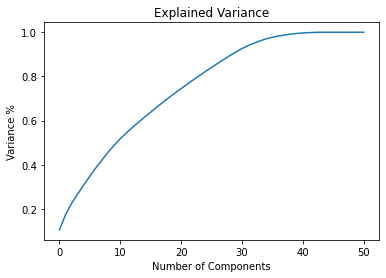

In [94]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

40 components explain around 95% variance in Data

In [95]:
pca = PCA(n_components=40)
new_comp = pca.fit_transform(scaled_x)
principle_x=pd.DataFrame(new_comp,columns=np.arange(40))

In [96]:
principle_x

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.031941,2.311222,-1.160035,3.215370,-0.089326,-0.307277,-1.003971,-0.282032,-0.530436,-2.077219,...,1.883206,-0.684072,0.265501,0.708843,-0.252478,0.194963,-0.079865,-0.330124,-0.698297,0.484028
1,0.051299,-1.538251,-0.210676,-1.664345,0.725262,2.211966,1.053390,1.118089,2.445317,-1.286188,...,0.487190,0.946568,-1.515380,0.856781,0.059550,0.098837,0.117522,-0.414015,-0.285159,0.051614
2,-2.927417,-0.987740,-0.223527,1.577814,-0.083685,-0.132289,-2.811157,-0.852381,0.537742,0.582974,...,1.456953,0.665812,0.287715,-0.145571,0.503217,0.404274,-0.048017,-0.245598,0.174375,0.172939
3,-1.193656,-1.045215,-0.718687,2.291321,-0.206484,2.529887,0.901391,0.029846,-1.778628,-1.897124,...,-1.249481,0.242208,0.083150,-0.440751,0.066631,-1.058416,1.109933,0.624083,-0.181875,0.247163
4,-2.120556,-1.185866,0.537528,-1.280320,-0.719151,-1.681079,-0.474520,-0.306182,-0.584991,1.695307,...,1.684114,0.522206,1.405010,0.019260,-0.549613,-0.117751,-0.031605,0.218358,-0.147111,-0.014929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-1.113888,-1.377802,0.224588,-1.673978,-0.301156,0.751034,0.000544,1.546781,-0.309528,1.423931,...,0.929989,0.451869,-0.255711,0.361264,-0.146766,-0.091483,-0.305026,0.490879,0.933782,-0.385277
1466,0.922108,-1.450211,0.122695,-1.309547,-0.463807,-1.092082,0.022096,-0.763595,0.061178,1.776073,...,0.734812,0.714612,0.196119,0.953153,-0.622741,0.011110,0.085395,-0.791661,-0.162201,-0.216795
1467,-1.075323,-1.255871,0.109135,0.504716,-1.646469,1.180698,-0.344999,-0.974887,3.056663,-1.938060,...,-0.268272,-0.710119,0.524350,-0.147341,-0.101577,-0.045054,-0.176225,0.611059,-0.472178,0.412815
1468,1.186090,1.988549,-0.227107,-1.444152,0.444060,0.965751,-0.280175,0.958075,-0.723038,1.138743,...,-0.367722,-1.073215,-1.839572,1.283171,0.063790,-0.877779,-0.220976,-0.396698,-0.175744,-0.165386


### Selecting Kbest Features

In [97]:
from sklearn.feature_selection import SelectKBest, f_classif

In [98]:
bestfeat = SelectKBest(score_func = f_classif, k = 51)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [99]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(51,'Score'))

                              Feature      Score
49                        OverTime_No  94.656457
50                       OverTime_Yes  94.656457
48               MaritalStatus_Single  46.606985
16                  TotalWorkingYears  44.252491
7                            JobLevel  43.215344
20                 YearsInCurrentRole  38.838303
9                       MonthlyIncome  38.488819
0                                 Age  38.175887
45       JobRole_Sales Representative  37.212798
22               YearsWithCurrManager  36.712311
15                   StockOptionLevel  28.140501
19                     YearsAtCompany  27.001624
6                      JobInvolvement  25.241985
24   BusinessTravel_Travel_Frequently  19.724032
8                     JobSatisfaction  15.890004
4             EnvironmentSatisfaction  15.855209
39      JobRole_Laboratory Technician  14.320730
47              MaritalStatus_Married  12.253576
42          JobRole_Research Director  11.686339
46             Marit

Selecting best features based on their scores and dropping a highly colinear column 'MonthlyIncome'.

In [100]:
x_best = x.drop(columns=['MonthlyIncome','YearsSinceLastPromotion','Department_Human Resources','EducationField_Other','JobRole_Sales Executive','MonthlyRate','PerformanceRating','PercentSalaryHike','JobRole_Research Scientist','HourlyRate']).copy()

In [101]:
x_best

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,RelationshipSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,3,2,4,8,1,...,0,0,0,0,0,0,0,1,0,1
1,49,279,8,1,3,2,2,2,1,4,...,0,0,0,0,0,0,1,0,1,0
2,37,1373,2,2,4,2,1,3,6,2,...,1,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,3,1,3,1,3,...,0,0,0,0,0,0,1,0,0,1
4,27,591,2,1,1,3,1,2,9,4,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,4,2,4,4,3,...,1,0,0,0,0,0,1,0,1,0
1466,39,613,6,1,4,2,3,1,4,1,...,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,3,2,4,2,2,1,2,...,0,0,1,0,0,0,1,0,0,1
1468,49,1023,2,3,4,2,2,2,2,4,...,0,0,0,0,0,0,1,0,1,0


In [102]:
scaled_x_best = scaler.fit_transform(x_best)

## Classification Model Building

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Finding the best random state

In [104]:
from sklearn.linear_model import LogisticRegression
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i,stratify = y)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9013157894736842 on random_state: 35


In [105]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, stratify = y,random_state = 5) #since class imbalance exists

In [106]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [108]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
XGBC= XGBClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier()

### Training the Models

In [109]:
DTC.fit(x_train,y_train)
RFC.fit(x_train,y_train)
XGBC.fit(x_train,y_train)
adbc.fit(x_train,y_train)
SV.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
KNN.fit(x_train,y_train)

[13:55:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KNeighborsClassifier()

All Models have been trained.

### Decision Tree Classifier Model Accuracy

In [110]:
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)

In [111]:
conf_matrx = confusion_matrix(y_test,DTCpred)

In [112]:
conf_matrx

array([[325,  57],
       [ 45,  29]], dtype=int64)

In [113]:
print(accu)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       382
           1       0.34      0.39      0.36        74

    accuracy                           0.78       456
   macro avg       0.61      0.62      0.61       456
weighted avg       0.79      0.78      0.78       456



### Logistic Regression Model Accuracy

In [114]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)


In [115]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[372,  10],
       [ 51,  23]], dtype=int64)

In [116]:
print(accu)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       382
           1       0.70      0.31      0.43        74

    accuracy                           0.87       456
   macro avg       0.79      0.64      0.68       456
weighted avg       0.85      0.87      0.84       456



### Random Forest Classifier Model Accuracy

In [117]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [118]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[380,   2],
       [ 62,  12]], dtype=int64)

In [119]:
print(accu)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       382
           1       0.86      0.16      0.27        74

    accuracy                           0.86       456
   macro avg       0.86      0.58      0.60       456
weighted avg       0.86      0.86      0.82       456



### XGB Classifier Model Accuracy

In [120]:
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)

In [121]:
conf_matrx = confusion_matrix(y_test,XGBCpred)
conf_matrx

array([[368,  14],
       [ 53,  21]], dtype=int64)

In [122]:
print(accu)

              precision    recall  f1-score   support

           0       0.87      0.96      0.92       382
           1       0.60      0.28      0.39        74

    accuracy                           0.85       456
   macro avg       0.74      0.62      0.65       456
weighted avg       0.83      0.85      0.83       456



### AdaBoost Classifier Model Accuracy

In [123]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [124]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[370,  12],
       [ 49,  25]], dtype=int64)

In [125]:
print(accu)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       382
           1       0.68      0.34      0.45        74

    accuracy                           0.87       456
   macro avg       0.78      0.65      0.69       456
weighted avg       0.85      0.87      0.85       456



### SV Classifier Model Accuracy

In [126]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx


array([[374,   8],
       [ 61,  13]], dtype=int64)

In [127]:
print(accu)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       382
           1       0.62      0.18      0.27        74

    accuracy                           0.85       456
   macro avg       0.74      0.58      0.59       456
weighted avg       0.82      0.85      0.81       456



### K Nearest Neighbours Classifier Model Accuracy

In [128]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)



In [129]:
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[374,   8],
       [ 68,   6]], dtype=int64)

In [130]:
print(accu)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       382
           1       0.43      0.08      0.14        74

    accuracy                           0.83       456
   macro avg       0.64      0.53      0.52       456
weighted avg       0.78      0.83      0.78       456



### Model Cross Validation

In [131]:
from sklearn.model_selection import cross_val_score as cvs

#### Decision Tree Classifier

In [132]:
print(cvs(DTC,scaled_x_best,y,cv=5).mean())

0.7782312925170067


#### Logistic Regression

In [133]:
print(cvs(LOGR,scaled_x_best,y,cv=5).mean()) 

0.8816326530612244


#### Random Forest Classifier

In [134]:
print(cvs(RFC,scaled_x_best,y,cv=5).mean())

0.8605442176870748


#### XGB Classifier

In [135]:
print(cvs(XGBC,scaled_x_best,y,cv=5).mean())

[13:57:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

#### Adaboost Classifier

In [136]:
print(cvs(adbc,scaled_x_best,y,cv=5).mean())

0.8741496598639454


#### SV Classifier

In [137]:
print(cvs(SV,scaled_x_best,y,cv=5).mean())

0.864625850340136


#### K Nearest Neighbours Classifier

In [138]:
print(cvs(KNN,scaled_x_best,y,cv=5).mean())

0.846938775510204


### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Adaboost is the best model.

### ROC AUC Scores

#### Decision Tree Classifier

In [139]:
roc_auc_score(y_test,DTCpred)

0.621338616103014

#### Logistic Regression

In [140]:
roc_auc_score(y_test,LOGRpred)

0.6423164001698033

#### Random Forest Classifier

In [141]:
roc_auc_score(y_test,RFCpred)

0.5784632800339607

#### XGB Classifier

In [142]:
roc_auc_score(y_test,XGBCpred)

0.6235672845620489

#### Adaboost Classifier

In [143]:
roc_auc_score(y_test,adbcpred)

0.6532121126361963

#### SV Classifier

In [144]:
roc_auc_score(y_test,SVpred)

0.5773666336493561

#### K Nearest Neighbours Classifier

In [145]:
roc_auc_score(y_test,KNNpred)

0.5300693363520589

### ROC AUC curves 

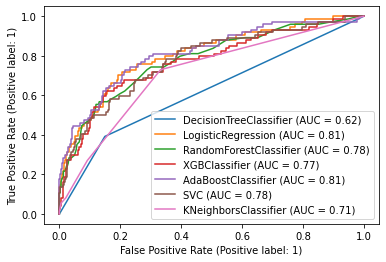

In [146]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,XGBC,adbc,SV,KNN]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

### Based on the above graph and roc_auc_scores, Logistic Regression is the best model for the dataset, with AUC = 0.88 and roc_auc_score = 0.7663

### Hyper Parameter Tuning

In [147]:
from sklearn.model_selection import GridSearchCV

#### Logistic Regression

In [148]:
parameter = {'C':[0.001,0.01,0.1,0,1,1.1],'penalty':['l1', 'l2', 'elasticnet', 'none'],'dual': [True,False],'fit_intercept':[True,False],'random_state':[1,2,3,5,10,20,45],'solver':['liblinear'],'max_iter':[100,200,300,400,500],'multi_class':['auto', 'ovr', 'multinomial']}

In [149]:
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1,verbose=2)

In [150]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0, 1, 1.1],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300, 400, 500],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [1, 2, 3, 5, 10, 20, 45],
                         'solver': ['liblinear']},
             verbose=2)

In [151]:
GridCV.best_params_

{'C': 1.1,
 'dual': False,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l1',
 'random_state': 1,
 'solver': 'liblinear'}

In [152]:
Best_mod1 = LogisticRegression(C = 0.1,dual = True,fit_intercept = True,max_iter = 100,multi_class = 'auto', penalty = 'l2',random_state= 1,solver = 'liblinear')
Best_mod1.fit(x_train,y_train)
lrpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,lrpred)
print(acc*100)

87.06140350877193


#### `Logistic Regression has an accuracy score of 87.06%`

In [154]:
conf_matrx = confusion_matrix(y_test,lrpred)
conf_matrx

array([[375,   7],
       [ 52,  22]], dtype=int64)

#### AdaBoost

In [155]:
parameter = {'base_estimator':[SV,LOGR],'n_estimators':[10, 50, 100, 500],'learning_rate': [0.1,0.5,1,1.5,2],'algorithm':['SAMME','SAMME.R'],'random_state':[1,2,3,5,10,20,45]}

In [157]:
GridCV = GridSearchCV(AdaBoostClassifier(),parameter,cv=5,n_jobs = -1,verbose=2)

In [158]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [SVC(),
                                            LogisticRegression(solver='liblinear')],
                         'learning_rate': [0.1, 0.5, 1, 1.5, 2],
                         'n_estimators': [10, 50, 100, 500],
                         'random_state': [1, 2, 3, 5, 10, 20, 45]},
             verbose=2)

In [159]:
GridCV.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': LogisticRegression(solver='liblinear'),
 'learning_rate': 1.5,
 'n_estimators': 10,
 'random_state': 1}

In [160]:
Best_mod2 = AdaBoostClassifier(base_estimator = LOGR,n_estimators =100,learning_rate =0.1,algorithm = 'SAMME.R',random_state = 1)
Best_mod2.fit(x_train,y_train)
adapred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,adapred)
print(acc*100)

87.06140350877193


#### AdaBoost has an accuracy score of 88.83%

In [161]:
conf_matrx = confusion_matrix(y_test,adapred)
conf_matrx

array([[375,   7],
       [ 52,  22]], dtype=int64)

### On comparing the accuracies and ROC AUC scores of the Logistic Regression and AdaBoost Classifier Models, it shows both models are performing equally.

#### Saving The Model

In [162]:
import joblib
joblib.dump(Best_mod1,"BestModelHR.pkl")

['BestModelHR.pkl']

#### Loading The Model

In [163]:
mod=joblib.load("BestModelHR.pkl")

In [164]:
print(mod.predict(x_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
